# **Initial Preparation**

##Install Requirements

In [ ]:
# Install transformers and datasets libraries
#!pip install transformers torch datasets


In [ ]:
!pip install "transformers==4.35" "datasets==2.13.0" "peft==0.4.0" "accelerate==0.21.0" "bitsandbytes==0.40.2" "trl==0.4.7" "safetensors>=0.3.1" "tiktoken"
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.1/123.1 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## Import Libraries

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch
import csv

In [ ]:
import pandas as pd
import torch
from datasets import Dataset, load_dataset
from random import randrange
from peft import LoraConfig, get_peft_model, AutoPeftModelForCausalLM
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, TrainingArguments
from trl import SFTTrainer

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import Dataset
import torch


# Data Acquisation & Understanding

## Load the Dataset

In [ ]:
data = pd.read_csv('/content/medquad.csv', encoding='utf-8', nrows=2000)
data.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


## Explore and Analyze the Dataset

We will check the dataset for basic information, including the number of unique questions, repeated questions, and any potential duplicates. This will help us understand the dataset’s structure and decide on preprocessing steps.


In [ ]:
print("Dataset shape:", data.shape)
print("Columns:", data.columns)

Dataset shape: (2000, 4)
Columns: Index(['question', 'answer', 'source', 'focus_area'], dtype='object')


### 1. Column Summary and Data Types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    2000 non-null   object
 1   answer      2000 non-null   object
 2   source      2000 non-null   object
 3   focus_area  2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


### 2. Distribution of Questions and Answers

In [ ]:
# Count the number of unique questions
unique_questions_count = data['question'].nunique()
print("Number of unique questions:", unique_questions_count)

# Count the frequency of each question
question_counts = data['question'].value_counts()
print("Top 10 most common questions:\n", question_counts.head(10))


Number of unique questions: 1433
Top 10 most common questions:
 question
What is (are) High Blood Cholesterol ?           18
What is (are) Medicare and Continuing Care ?     14
What is (are) Skin Cancer ?                      12
What is (are) Breast Cancer ?                    12
What are the treatments for Breast Cancer ?      12
What is (are) Colorectal Cancer ?                12
What is (are) Stroke ?                           11
What is (are) Leukemia ?                         10
What are the treatments for Prostate Cancer ?    10
What is (are) High Blood Pressure ?              10
Name: count, dtype: int64


### 3. Analysis of Repeated Questions
This helps to understand which questions are repeated in the dataset and how often each appears, which can be useful for the model.

In [ ]:
# Find questions that appear more than once
repeated_questions = data[data.duplicated(subset=['question'], keep=False)]

# Display repeated questions and their counts
repeated_questions_summary = repeated_questions['question'].value_counts()
print("Number of repeated questions:", len(repeated_questions_summary))
print("Examples of repeated questions:\n", repeated_questions_summary.head(10))


Number of repeated questions: 213
Examples of repeated questions:
 question
What is (are) High Blood Cholesterol ?           18
What is (are) Medicare and Continuing Care ?     14
What is (are) Colorectal Cancer ?                12
What is (are) Breast Cancer ?                    12
What is (are) Skin Cancer ?                      12
What are the treatments for Breast Cancer ?      12
What is (are) Stroke ?                           11
What is (are) High Blood Pressure ?              10
What are the treatments for Prostate Cancer ?    10
What is (are) Leukemia ?                         10
Name: count, dtype: int64


### 4. Check if repeated questions have the same or different answers

Here we group the dataset by question and calculates the number of unique answers for each question. It then filters for questions that have more than one unique answer, showing only those with multiple responses.

In [ ]:
# Group by 'question' and count unique answers for each question
question_answer_variation = data.groupby('question')['answer'].nunique().reset_index()
question_answer_variation.columns = ['question', 'unique_answer_count']

# Filter questions with multiple unique answers
repeated_questions_with_different_answers = question_answer_variation[question_answer_variation['unique_answer_count'] > 1]

# Display questions that have multiple unique answers
print("Questions with multiple unique answers:")
print(repeated_questions_with_different_answers)


Questions with multiple unique answers:
                                               question  unique_answer_count
183            How to diagnose Alzheimer's Caregiving ?                    2
184               How to diagnose Alzheimer's Disease ?                    3
188                     How to diagnose Breast Cancer ?                    3
189                              How to diagnose COPD ?                    2
211   How to diagnose Creating a Family Health Histo...                    2
...                                                 ...                  ...
1415  what research (or clinical trials) is being do...                    2
1416  what research (or clinical trials) is being do...                    3
1417  what research (or clinical trials) is being do...                    2
1423  what research (or clinical trials) is being do...                    4
1425  what research (or clinical trials) is being do...                    2

[213 rows x 2 columns]


In [ ]:
# Select two questions with multiple unique answers for display
sample_questions = repeated_questions_with_different_answers['question'].head(2)

# Filter the main dataset for these two questions
sample_repeated_questions_data = data[data['question'].isin(sample_questions)]

# Sort by question for organized display
sample_repeated_questions_data = sample_repeated_questions_data.sort_values(by='question')


for question in sample_questions:
    print(f"\nQuestion: {question}\n")
    answers = sample_repeated_questions_data[sample_repeated_questions_data['question'] == question]['answer']
    for idx, answer in enumerate(answers, 1):
        print(f"Answer {idx}: {answer}\n")




Question: How to diagnose Alzheimer's Caregiving ?

Answer 1: Now that your family member or friend has received a diagnosis of Alzheimers disease, its important to learn as much as you can about the disease and how to care for someone who has it. You may also want to know the right way to share the news with family and friends. Learning About Alzheimers Sometimes, you may feel that you don't know how to care for the person with Alzheimers. This is a common feeling among caregivers of people with Alzheimers because each day may bring different challenges. Learning about the disease can help you understand and cope with these challenges. Here is some information about Alzheimers and ways you can learn more about it. Alzheimers disease is an illness of the brain. It causes large numbers of nerve cells in the brain to die. This affects a persons ability to remember things and think clearly. People with Alzheimers become forgetful and easily confused and may have a hard time concentrating

# **Data Preprocessing**

### Handling Irrelevant Columns

* Since source and focus_area don’t directly contribute to the question-answering task, we can safely remove these columns. Retaining only question and answer will simplify the dataset and reduce unnecessary information that won’t be used during model training.
* Since only 5 answers are missing we can delete the columns that have missing values

In [ ]:
# Drop the columns 'source' and 'focus_area'
data = data.drop(columns=['source', 'focus_area'])

In [ ]:
# Remove rows where 'answer' is missing
data = data.dropna(subset=['answer'])

# Verify that no missing values remain in 'question' and 'answer'
print("Remaining missing values:\n", data.isnull().sum())


Remaining missing values:
 question    0
answer      0
dtype: int64


### Remove Exact Duplicates

In [ ]:
# Remove rows where both the question and answer are identical
data_unique = data.drop_duplicates(subset=['question', 'answer'])

# Check new number of rows after removing exact duplicates
print("Number of rows after removing exact duplicates:", data_unique.shape[0])


Number of rows after removing exact duplicates: 2000


### Check for Missing Values

In [ ]:
# Display the count of missing values for each column
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Display the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)


Missing values per column:
 question      0
answer        0
source        0
focus_area    0
dtype: int64

Percentage of missing values per column:
 question      0.0
answer        0.0
source        0.0
focus_area    0.0
dtype: float64


### Removing Unwanted Characters or Excessive Whitespace:

In [ ]:
# Minimal Preprocessing
def clean_text(text):
    # Remove excessive whitespace
    text = ' '.join(text.split())
    return text

# Apply cleaning to the 'question' and 'answer' columns
data['question'] = data['question'].apply(clean_text)
data['answer'] = data['answer'].apply(clean_text)


# **Splitting to train and test dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Now split into train and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Display the first few rows to confirm the change
print(train_data.head())

                                          question  \
968      What is (are) Myelodysplastic Syndromes ?   
240                 What is (are) Kidney Disease ?   
819  What is (are) Childhood Soft Tissue Sarcoma ?   
692                           What is (are) Gout ?   
420   What are the symptoms of Colorectal Cancer ?   

                                                answer  
968  Key Points - Myelodysplastic syndromes are a g...  
240  When you visit your doctor, here are questions...  
819  Key Points - Childhood soft tissue sarcoma is ...  
692  Sudden, Intense Joint Pain Gout is a form of a...  
420  Possible signs of colorectal cancer include: -...  


# Fine Tuning on Google Flan T5 Large

The model selected for this task is FLAN-T5 Large, a variant of the T5 (Text-to-Text
Transfer Transformer) model fine-tuned for instruction-following tasks. This model is
well-suited for a range of natural language processing (NLP) tasks, including questionanswering.


## Model Setup

### 1.Load the Model and Tokenizer

In [ ]:
pip install transformers torch


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-large")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_

### 2. Convert the DataFrame to a Hugging Face Dataset

In [ ]:
!pip install datasets


In [ ]:
from datasets import Dataset
# Convert DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)


###  3. Define Tokenization and Preprocessing Function

In [ ]:
def preprocess_function(examples):
    inputs = examples['question']
    targets = examples['answer']

    # Tokenize inputs and targets
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")

    # Setup the tokenizer for targets
    labels = tokenizer(targets, max_length=512, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the preprocessing function to the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [ ]:
print(val_data[:5])


                                               question  \
1860                        What is (are) Thalassemia ?   
353   what research (or clinical trials) is being do...   
1333  What is the outlook for Childhood Central Nerv...   
905   what research (or clinical trials) is being do...   
1289  What are the stages of Chronic Myeloproliferat...   

                                                 answer  
1860  Thalassemias are inherited blood disorders. If...  
353   The National Eye Institute, or NEI, is conduct...  
1333  Certain factors affect prognosis (chance of re...  
905   New types of treatment are being tested in cli...  
1289  Key Points - There is no standard staging syst...  


In [ ]:
print(val_data)

                                               question  \
1860                        What is (are) Thalassemia ?   
353   what research (or clinical trials) is being do...   
1333  What is the outlook for Childhood Central Nerv...   
905   what research (or clinical trials) is being do...   
1289  What are the stages of Chronic Myeloproliferat...   
...                                                 ...   
965              What are the stages of Rectal Cancer ?   
1284  Who is at risk for Adult Acute Lymphoblastic L...   
1739                       What is (are) Hypoglycemia ?   
261               How to diagnose Alzheimer's Disease ?   
535                             What causes Psoriasis ?   

                                                 answer  
1860  Thalassemias are inherited blood disorders. If...  
353   The National Eye Institute, or NEI, is conduct...  
1333  Certain factors affect prognosis (chance of re...  
905   New types of treatment are being tested in cli...  
1

### 4. Set Up Training Arguments

In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
from transformers import AutoModelForQuestionAnswering, Trainer, TrainingArguments
from transformers import TrainingArguments


training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    logging_strategy="steps",   # Enables step-by-step logging
    logging_steps=10,           # Display training loss every 10 steps
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)
model.gradient_checkpointing_enable()


### 5. Initialize the Trainer and train the model

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:457: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: sarasafer59 (sarasafer59-esprit). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch,Training Loss,Validation Loss
1,1.242700,1.062044
2,1.014700,0.927548
3,0.924500,0.909394


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


TrainOutput(global_step=600, training_loss=3.0281810029347738, metrics={'train_runtime': 3397.4751, 'train_samples_per_second': 1.413, 'train_steps_per_second': 0.177, 'total_flos': 1.10628861640704e+16, 'train_loss': 3.0281810029347738, 'epoch': 3.0})

### 6. Save the model

In [ ]:
trainer.save_model("./fine_tuned_flan_t5_large")
tokenizer.save_pretrained("./fine_tuned_flan_t5_large")


## **Evaluation before Fine Tuning**

### 1. Evaluate Model Performance Quantitatively

#### **Validation loss**

In [ ]:
# Evaluate model performance on the validation set
eval_results = trainer.evaluate()
print(f"Validation Loss: {eval_results['eval_loss']:.4f}")


Validation Loss: 0.9094


**BLEU Score**

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_bleu(model, tokenizer, dataset, num_samples=100):
    bleu_scores = []
    device = model.device  # Make sure the model and tokenizer are on the same device

    for i in range(min(num_samples, len(dataset))):
        sample = dataset[i]

        # Input text consists only of the question in this case
        input_text = sample['question']

        # Tokenize and prepare input
        inputs = tokenizer(input_text, return_tensors="pt").to(device)
        outputs = model.generate(inputs['input_ids'], max_length=100)

        # Decode the generated output
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Reference answer for calculating BLEU score
        reference_text = sample['answer']

        # Calculate BLEU score with smoothing
        score = sentence_bleu([reference_text.split()], generated_text.split(),
                              smoothing_function=SmoothingFunction().method1)
        bleu_scores.append(score)

    # Calculate the average BLEU score across all samples
    avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
    print("Average BLEU score:", avg_bleu_score)
    return avg_bleu_score

# Now run the BLEU calculation on your model and dataset
average_bleu = calculate_bleu(model, tokenizer, val_dataset, num_samples=100)


Average BLEU score: 0.008185154286891651


**ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**


In [ ]:
import evaluate

# Load ROUGE metric
rouge = evaluate.load("rouge")

def calculate_rouge(model, tokenizer, dataset, num_samples=100):
    rouge_scores = []
    for i in range(num_samples):
        sample = dataset[i]
        input_text = sample['question']
        reference = sample['answer']

        # Generate the model's answer
        inputs = tokenizer(input_text, return_tensors="pt").to(model.device)
        output_ids = model.generate(inputs["input_ids"], max_length=100)
        generated_answer = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        # Compute ROUGE score
        rouge_score = rouge.compute(predictions=[generated_answer], references=[reference])
        rouge_scores.append(rouge_score)

    # Calculate average ROUGE scores
    avg_rouge = {key: sum(score[key] for score in rouge_scores) / num_samples for key in rouge_scores[0]}
    print("Average ROUGE score:", avg_rouge)
    return avg_rouge
rouge = calculate_rouge(model, tokenizer, val_dataset, num_samples=100)

Average ROUGE score: {'rouge1': 0.18099617450861827, 'rouge2': 0.039737180608210076, 'rougeL': 0.1378623999401774, 'rougeLsum': 0.1378623999401774}


####**Perplexity**

In [ ]:
import torch.nn.functional as F

def calculate_perplexity(model, tokenizer, dataset, num_samples=100):
    perplexities = []
    for i in range(min(num_samples, len(dataset))):
        sample = dataset[i]
        input_text = sample['question']
        reference_text = sample['answer']

        inputs = tokenizer(input_text, return_tensors="pt").to(model.device)
        labels = tokenizer(reference_text, return_tensors="pt").input_ids.to(model.device)

        with torch.no_grad():
            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            perplexity = torch.exp(loss).item()
            perplexities.append(perplexity)

    avg_perplexity = sum(perplexities) / len(perplexities)
    print("Average Perplexity:", avg_perplexity)
    return avg_perplexity

perplexity = calculate_perplexity(model, tokenizer, val_dataset, num_samples=100)

Token indices sequence length is longer than the specified maximum sequence length for this model (1648 > 512). Running this sequence through the model will result in indexing errors


Average Perplexity: 6.247942788600922


### 2. Define the Test Function Qualitatively

Create a function to handle testing on a set of input questions and contexts. This function will generate answers using the fine-tuned model and print or store the results for evaluation.

In [ ]:
import torch

def test_model(model, tokenizer, dataset, num_samples=5, max_length=100):
    model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Loop over the dataset and generate predictions
    for i in range(num_samples):
        # Prepare inputs
        sample = dataset[i]
        input_text = sample['question'] + " " + sample['answer']  # Adjust based on your dataset structure
        inputs = tokenizer(input_text, return_tensors="pt").to(device)

        # Generate output
        with torch.no_grad():
            outputs = model.generate(inputs['input_ids'], max_length=max_length)

        # Decode and print the generated answer
        generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
        true_answer = sample['answer']  # Adjust if necessary for your dataset

        print(f"Question: {sample['question']}")
        print(f"Context: {sample['answer']}")
        print(f"Generated Answer: {generated_answer}")
        print(f"True Answer: {true_answer}")
        print("=" * 50)




In [ ]:
test_model(model, tokenizer, val_dataset, num_samples=5, max_length=100)


Question: What is (are) Thalassemia ?
Context: Thalassemias are inherited blood disorders. If you have one, your body makes fewer healthy red blood cells and less hemoglobin. Hemoglobin is a protein that carries oxygen to the body. That leads to anemia. Thalassemias occur most often among people of Italian, Greek, Middle Eastern, Southern Asian, and African descent. Thalassemias can be mild or severe. Some people have no symptoms or mild anemia. The most common severe type in the United States is called Cooley's anemia. It usually appears during the first two years of life. People with it may have severe anemia, slowed growth and delayed puberty, and problems with the spleen, liver, heart, or bones. Doctors diagnose thalassemias using blood tests. Treatments include blood transfusions and treatment to remove excess iron from the body. If you have mild symptoms or no symptoms, you may not need treatment. In some severe cases, you may need a bone marrow transplant. NIH: National Heart, L

## **Fine**-**tuning**

### **1. Applying PEFT with LoRA**

Parameter-Efficient Fine-Tuning (PEFT) with LoRA (Low-Rank Adaptation) is a method to fine-tune large language models efficiently by training only small, low-rank matrices added to specific layers, while keeping the original model weights frozen. This significantly reduces the number of parameters that need to be adjusted, making fine-tuning faster and less resource-intensive.

Key Points:

- Efficiency: Only the added low-rank matrices are trained, so memory and computational costs are minimized.
- Task-Specific Adaptation: LoRA allows fine-tuning for specific tasks without modifying the core model, useful for deploying large models across various applications.
- Speed: Fewer parameters to update means faster fine-tuning, ideal for iterative tasks or constrained hardware environments.

LoRA in PEFT is especially useful for adapting large models on specialized tasks without needing extensive computational resources.

##### Install Necessary Libraries

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from peft import LoraConfig, get_peft_model
import torch

#### Load the Pretrained Model and Tokenizer

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-large")
model_lora = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-large")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


#### Configure LoRA


In [ ]:
from peft import TaskType

lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,  # Since T5 is a sequence-to-sequence model
    inference_mode=False,  # Set to False for training mode
    r=8,  # Rank of the LoRA : how many parameters LoRA will use.
    lora_alpha=32,  # Scaling factor for LoRA
    lora_dropout=0.1  # prevent overfitting by randomly "dropping out" parts of the LoRA layers
)

# Wrap the model with LoRA
model = get_peft_model(model_lora, lora_config)


#### Prepare The Dataset

In [ ]:
from datasets import Dataset
# Convert DataFrames to Hugging Face Datasets
train_data = Dataset.from_pandas(train_data)
val_data = Dataset.from_pandas(val_data)

In [ ]:
def preprocess_function(examples):
    inputs = [f"Question: {q}" for q in examples["question"]]
    targets = examples["answer"]
    model_inputs = tokenizer(inputs, max_length=128, padding="max_length", truncation=True)
    labels = tokenizer(targets, max_length=128, padding="max_length", truncation=True).input_ids

    model_inputs["labels"] = labels
    return model_inputs

# Apply preprocessing on your dataset
train_data = train_data.map(preprocess_function, batched=True)
val_data = val_data.map(preprocess_function, batched=True)


Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

#### Train the model

In [ ]:
#Training was done using the Trainer API from Hugging Face
training_args = TrainingArguments(
    output_dir="./lora_fine_tuned_model",
    evaluation_strategy="epoch",
    learning_rate=5e-4,  # LoRA often benefits from a higher learning rate
    num_train_epochs=3,
    per_device_train_batch_size=4,  # Adjust based on your hardware capacity
    save_steps=10_000,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
)

# Start training
trainer.train()

# Save the final model and tokenizer
trainer.save_model("./lora_fine_tuned_model")
tokenizer.save_pretrained("./lora_fine_tuned_model")


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:457: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.682542
2,2.517800,1.573104
3,1.672400,1.550586


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


('./lora_fine_tuned_model/tokenizer_config.json',
 './lora_fine_tuned_model/special_tokens_map.json',
 './lora_fine_tuned_model/spiece.model',
 './lora_fine_tuned_model/added_tokens.json',
 './lora_fine_tuned_model/tokenizer.json')

#### **Evaluation after using LoRA**

#####Qualitative testing

In [ ]:
def test_model(model, tokenizer, dataset, num_samples=5, max_length=100):
    model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for i in range(num_samples):
        sample = dataset[i]
        input_text = sample['question']
        true_answer = sample['answer']  # Assuming the true answer is under 'answer' in your dataset

        # Tokenize input text and move to the correct device
        inputs = tokenizer(input_text, return_tensors="pt").to(device)

        # Generate output
        with torch.no_grad():
            outputs = model.generate(input_ids=inputs['input_ids'], max_length=max_length)

        # Decode generated and true answers
        generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
        print(f"Input Question: {input_text}")
        print(f"True Answer: {true_answer}")
        print(f"Generated Answer: {generated_answer}\n")

# Run the function
test_model(model, tokenizer, val_data, num_samples=5, max_length=100)


Input Question: What is (are) Thalassemia ?
True Answer: Thalassemias are inherited blood disorders. If you have one, your body makes fewer healthy red blood cells and less hemoglobin. Hemoglobin is a protein that carries oxygen to the body. That leads to anemia. Thalassemias occur most often among people of Italian, Greek, Middle Eastern, Southern Asian, and African descent. Thalassemias can be mild or severe. Some people have no symptoms or mild anemia. The most common severe type in the United States is called Cooley's anemia. It usually appears during the first two years of life. People with it may have severe anemia, slowed growth and delayed puberty, and problems with the spleen, liver, heart, or bones. Doctors diagnose thalassemias using blood tests. Treatments include blood transfusions and treatment to remove excess iron from the body. If you have mild symptoms or no symptoms, you may not need treatment. In some severe cases, you may need a bone marrow transplant. NIH: Nationa

#####**Validation loss**

In [ ]:
# Evaluate model performance on the validation set
eval_results = trainer.evaluate()
print(f"Validation Loss: {eval_results['eval_loss']:.4f}")

Validation Loss: 1.5506


#####**BLEU** **Score**

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_bleu(model, tokenizer, dataset, num_samples=100):
    bleu_scores = []
    device = model.device  # Ensure the model and tokenizer are on the same device

    for i in range(min(num_samples, len(dataset))):
        sample = dataset[i]

        # Input text consists only of the question in this case
        input_text = sample['question']

        # Tokenize and prepare input
        inputs = tokenizer(input_text, return_tensors="pt").to(device)

        # Access base model's generate method
        outputs = model.base_model.generate(inputs['input_ids'], max_length=100)

        # Decode the generated output
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Reference answer for calculating BLEU score
        reference_text = sample['answer']

        # Calculate BLEU score with smoothing
        score = sentence_bleu([reference_text.split()], generated_text.split(),
                              smoothing_function=SmoothingFunction().method1)
        bleu_scores.append(score)

    # Calculate the average BLEU score across all samples
    avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
    print("Average BLEU score:", avg_bleu_score)
    return avg_bleu_score

# Run the BLEU calculation
average_bleu = calculate_bleu(model, tokenizer, val_data, num_samples=100)


Average BLEU score: 0.027946411910918324


##### **Perplexity**

In [ ]:
import torch.nn.functional as F

def calculate_perplexity(model, tokenizer, dataset, num_samples=100):
    perplexities = []
    for i in range(min(num_samples, len(dataset))):
        sample = dataset[i]
        input_text = sample['question']
        reference_text = sample['answer']

        inputs = tokenizer(input_text, return_tensors="pt").to(model.device)
        labels = tokenizer(reference_text, return_tensors="pt").input_ids.to(model.device)

        with torch.no_grad():
            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            perplexity = torch.exp(loss).item()
            perplexities.append(perplexity)

    avg_perplexity = sum(perplexities) / len(perplexities)
    print("Average Perplexity:", avg_perplexity)
    return avg_perplexity

perplexity = calculate_perplexity(model, tokenizer, val_data, num_samples=100)

Token indices sequence length is longer than the specified maximum sequence length for this model (1648 > 512). Running this sequence through the model will result in indexing errors


Average Perplexity: 7.777258045673371


## **2.** **Applying Prompt Tuning**

Prompt Tuning is another technique that modifies the input to the model by adding
a trainable soft prompt to guide the model’s behavior. Unlike traditional fine-tuning,
where model weights are modified, prompt tuning only adds a small, learnable set of
prompt embeddings to the model’s input embeddings.


### Define Soft Prompt Tuning Layer

In [ ]:
class SoftPromptTuning(torch.nn.Module):
    def __init__(self, model, prompt_length=10, hidden_size=768):
        super(SoftPromptTuning, self).__init__()
        self.prompt_embeddings = torch.nn.Parameter(torch.randn(prompt_length, hidden_size) * 0.01)  # Smaller values
        self.model = model
        self.prompt_length = prompt_length

    def forward(self, input_ids, attention_mask, labels=None):
        # Get the input embeddings
        inputs_embeds = self.model.get_input_embeddings()(input_ids)

        # Add the soft prompt to the beginning of the input embeddings
        prompt_embeds = self.prompt_embeddings.unsqueeze(0).expand(inputs_embeds.size(0), -1, -1)
        inputs_embeds = torch.cat([prompt_embeds, inputs_embeds], dim=1)

        # Adjust the attention mask for the prompt tokens
        prompt_mask = torch.ones((attention_mask.size(0), self.prompt_length), device=attention_mask.device)
        attention_mask = torch.cat([prompt_mask, attention_mask], dim=1)

        # Pass through the model with modified inputs
        outputs = self.model(inputs_embeds=inputs_embeds, attention_mask=attention_mask, labels=labels)
        return outputs


### Load Model and Wrap It with Soft Prompt Tuning

In [ ]:
# Load base model and tokenizer
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
base_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Define soft prompt tuning with model wrapper
soft_prompt_model = SoftPromptTuning(base_model, prompt_length=10, hidden_size=base_model.config.d_model)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

### Prepare the Dataset


In [ ]:
from datasets import Dataset
# Convert DataFrames to Hugging Face Datasets
train_data_prompt = Dataset.from_pandas(train_data)
val_data_prompt = Dataset.from_pandas(val_data)

### Define the Prompt and Data Preprocessing

In [ ]:
def preprocess_function(examples):
    # Add prompts to questions
    inputs = ["Answer the following medical question: " + question for question in examples["question"]]
    targets = examples["answer"]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length").input_ids
    model_inputs["labels"] = labels
    return model_inputs

# Tokenize data
train_data_tokenized = train_data_prompt.map(preprocess_function, batched=True)
val_data_tokenized = val_data_prompt.map(preprocess_function, batched=True)

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

### Initialize the Trainer with Prompt Tuning Parameters

In [ ]:
import torch
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, Trainer

# Reduce batch size and add gradient accumulation
training_args = Seq2SeqTrainingArguments(
    output_dir="./soft_prompt_tuning",
    evaluation_strategy="epoch",  # Use "no" if you want to skip validation during training
    learning_rate=5e-6,
    per_device_train_batch_size=1,  # Lower batch size
    per_device_eval_batch_size=1,
    num_train_epochs=5,
    weight_decay=0.01,
    predict_with_generate=True,
    max_grad_norm=1.0,
    gradient_accumulation_steps=4,  # Use accumulation for larger effective batch size
    fp16=False,
    save_safetensors=False,
    save_steps=0,
)

# Enable gradient checkpointing
base_model.gradient_checkpointing_enable()

for param in soft_prompt_model.model.parameters():
    param.requires_grad = False
# Clear any cached memory
torch.cuda.empty_cache()

# Initialize the trainer
trainer = Trainer(

    model=soft_prompt_model,
    args=training_args,
    train_dataset=train_data_tokenized,
    eval_dataset=val_data_tokenized,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-27-ac89f9f3a660>:30: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,No log,4.614409
2,5.075200,4.623473
3,5.114200,4.613799
4,4.950800,4.617537
5,5.112500,4.621651


TrainOutput(global_step=2000, training_loss=5.063213500976563, metrics={'train_runtime': 2991.9796, 'train_samples_per_second': 2.674, 'train_steps_per_second': 0.668, 'total_flos': 0.0, 'train_loss': 5.063213500976563, 'epoch': 5.0})

### Evaluation after Prompt Tuning

#### 1. Validation loss

In [ ]:
results = trainer.evaluate()
print(results)


{'eval_loss': 4.6216511726379395, 'eval_runtime': 38.3464, 'eval_samples_per_second': 10.431, 'eval_steps_per_second': 10.431, 'epoch': 5.0}


#### 1. Define the test function

#####  **Testing Without adding a Prompt**



In [ ]:
import torch

def test_soft_prompt_tuning(soft_prompt_model, base_model, tokenizer, dataset, num_samples=5, max_length=100):
    """
    Test the T5 model with soft prompt tuning by generating answers to questions.

    Args:
    - soft_prompt_model: The model wrapper with soft prompt tuning.
    - base_model: The underlying T5 model that performs generation.
    - tokenizer: Tokenizer for encoding and decoding text.
    - dataset: Dataset containing questions and answers.
    - num_samples: Number of samples to test.
    - max_length: Maximum length of the generated answer.
    """

    base_model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    base_model.to(device)

    for i in range(num_samples):
        # Extract a question and true answer from the dataset
        sample = dataset[i]
        input_text = sample['question']
        true_answer = sample['answer']

        # Tokenize input question
        inputs = tokenizer(input_text, return_tensors="pt").to(device)

        # Retrieve the soft prompt embeddings from the soft_prompt_model
        prompt_embeds = soft_prompt_model.prompt_embeddings.unsqueeze(0).expand(inputs['input_ids'].size(0), -1, -1).to(device)

        # Get T5 input embeddings for the tokenized question and concatenate with soft prompts
        input_embeddings = base_model.get_input_embeddings()(inputs['input_ids'])
        combined_embeddings = torch.cat((prompt_embeds, input_embeddings), dim=1)

        # Adjust attention mask to account for the prompt length
        prompt_mask = torch.ones((inputs['attention_mask'].size(0), soft_prompt_model.prompt_length), device=device)
        attention_mask = torch.cat([prompt_mask, inputs['attention_mask']], dim=1)

        # Generate output using the base model with the combined embeddings and modified attention mask
        with torch.no_grad():
            outputs = base_model.generate(inputs_embeds=combined_embeddings, attention_mask=attention_mask, max_length=max_length)

        # Decode the generated output
        generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Display results
        print(f"Input Question: {input_text}")
        print(f"True Answer: {true_answer}")
        print(f"Generated Answer: {generated_answer}\n")

# Usage example:
# Assuming `val_data_tokenized` is your validation dataset and has been prepared with question-answer pairs
test_soft_prompt_tuning(soft_prompt_model, base_model, tokenizer, val_data_tokenized, num_samples=5, max_length=100)


Input Question: What is (are) Thalassemia ?
True Answer: Thalassemias are inherited blood disorders. If you have one, your body makes fewer healthy red blood cells and less hemoglobin. Hemoglobin is a protein that carries oxygen to the body. That leads to anemia. Thalassemias occur most often among people of Italian, Greek, Middle Eastern, Southern Asian, and African descent. Thalassemias can be mild or severe. Some people have no symptoms or mild anemia. The most common severe type in the United States is called Cooley's anemia. It usually appears during the first two years of life. People with it may have severe anemia, slowed growth and delayed puberty, and problems with the spleen, liver, heart, or bones. Doctors diagnose thalassemias using blood tests. Treatments include blood transfusions and treatment to remove excess iron from the body. If you have mild symptoms or no symptoms, you may not need treatment. In some severe cases, you may need a bone marrow transplant. NIH: Nationa

##### **Testing with a prompt**

In [ ]:
import torch

def test_detailed_generation(soft_prompt_model, base_model, tokenizer, dataset, num_samples=5, max_length=200):
    """
    Test the T5 model with soft prompt tuning by generating more detailed answers to healthcare questions.

    Args:
    - soft_prompt_model: The model wrapper with soft prompt tuning.
    - base_model: The underlying T5 model that performs generation.
    - tokenizer: Tokenizer for encoding and decoding text.
    - dataset: Dataset containing questions and answers.
    - num_samples: Number of samples to test.
    - max_length: Maximum length of the generated answer.
    """

    base_model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    base_model.to(device)

    for i in range(num_samples):
        # Extract a question and true answer from the dataset
        sample = dataset[i]
        input_text = sample['question']
        true_answer = sample['answer']

        # Add a prompt prefix to encourage detailed responses
        prompt_text = "Provide a detailed medical explanation: " + input_text

        # Tokenize the prompt text
        inputs = tokenizer(prompt_text, return_tensors="pt").to(device)

        # Retrieve the soft prompt embeddings from the soft_prompt_model
        prompt_embeds = soft_prompt_model.prompt_embeddings.unsqueeze(0).expand(inputs['input_ids'].size(0), -1, -1).to(device)

        # Get T5 input embeddings for the tokenized question and concatenate with soft prompts
        input_embeddings = base_model.get_input_embeddings()(inputs['input_ids'])
        combined_embeddings = torch.cat((prompt_embeds, input_embeddings), dim=1)

        # Adjust attention mask to account for the prompt length
        prompt_mask = torch.ones((inputs['attention_mask'].size(0), soft_prompt_model.prompt_length), device=device)
        attention_mask = torch.cat([prompt_mask, inputs['attention_mask']], dim=1)

        # Generate output with adjusted generation parameters
        with torch.no_grad():
            outputs = base_model.generate(
                inputs_embeds=combined_embeddings,
                attention_mask=attention_mask,
                max_length=max_length,  # Allowing longer responses
                temperature=0.7,        # Adjusting creativity level
                top_k=50,               # Limiting sampling to top 50 tokens
                top_p=0.9               # Nucleus sampling for more coherent output
            )

        # Decode the generated output
        generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Display results
        print(f"Input Question: {input_text}")
        print(f"True Answer: {true_answer}")
        print(f"Generated Answer: {generated_answer}\n")

# Usage example:
# Assuming `val_data_tokenized` is your validation dataset and has been prepared with question-answer pairs
test_detailed_generation(soft_prompt_model, base_model, tokenizer, val_data_tokenized, num_samples=5, max_length=200)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Input Question: What is (are) Thalassemia ?
True Answer: Thalassemias are inherited blood disorders. If you have one, your body makes fewer healthy red blood cells and less hemoglobin. Hemoglobin is a protein that carries oxygen to the body. That leads to anemia. Thalassemias occur most often among people of Italian, Greek, Middle Eastern, Southern Asian, and African descent. Thalassemias can be mild or severe. Some people have no symptoms or mild anemia. The most common severe type in the United States is called Cooley's anemia. It usually appears during the first two years of life. People with it may have severe anemia, slowed growth and delayed puberty, and problems with the spleen, liver, heart, or bones. Doctors diagnose thalassemias using blood tests. Treatments include blood transfusions and treatment to remove excess iron from the body. If you have mild symptoms or no symptoms, you may not need treatment. In some severe cases, you may need a bone marrow transplant. NIH: Nationa

##### **BLEU score**

In [ ]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
import torch
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def test_detailed_generation_with_bleu(soft_prompt_model, base_model, tokenizer, dataset, num_samples=5, max_length=200):
    """
    Test the T5 model with soft prompt tuning by generating answers to healthcare questions
    and calculate BLEU scores to evaluate the generated answers.

    Args:
    - soft_prompt_model: The model wrapper with soft prompt tuning.
    - base_model: The underlying T5 model that performs generation.
    - tokenizer: Tokenizer for encoding and decoding text.
    - dataset: Dataset containing questions and answers.
    - num_samples: Number of samples to test.
    - max_length: Maximum length of the generated answer.
    """

    base_model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    base_model.to(device)

    bleu_scores = []  # List to store individual BLEU scores

    for i in range(num_samples):
        # Extract a question and true answer from the dataset
        sample = dataset[i]
        input_text = sample['question']
        true_answer = sample['answer']

        # Add a prompt prefix to encourage detailed responses
        prompt_text = "Provide a detailed medical explanation: " + input_text

        # Tokenize the prompt text
        inputs = tokenizer(prompt_text, return_tensors="pt").to(device)

        # Retrieve the soft prompt embeddings from the soft_prompt_model
        prompt_embeds = soft_prompt_model.prompt_embeddings.unsqueeze(0).expand(inputs['input_ids'].size(0), -1, -1).to(device)

        # Get T5 input embeddings for the tokenized question and concatenate with soft prompts
        input_embeddings = base_model.get_input_embeddings()(inputs['input_ids'])
        combined_embeddings = torch.cat((prompt_embeds, input_embeddings), dim=1)

        # Adjust attention mask to account for the prompt length
        prompt_mask = torch.ones((inputs['attention_mask'].size(0), soft_prompt_model.prompt_length), device=device)
        attention_mask = torch.cat([prompt_mask, inputs['attention_mask']], dim=1)

        # Generate output with adjusted generation parameters
        with torch.no_grad():
            outputs = base_model.generate(
                inputs_embeds=combined_embeddings,
                attention_mask=attention_mask,
                max_length=max_length,
                temperature=0.7,
                top_k=50,
                top_p=0.9
            )

        # Decode the generated output
        generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Calculate BLEU score
        reference = [true_answer.split()]  # Reference answer tokenized into a list of words
        hypothesis = generated_answer.split()  # Generated answer tokenized into a list of words
        bleu_score = sentence_bleu(reference, hypothesis, smoothing_function=SmoothingFunction().method1)
        bleu_scores.append(bleu_score)

        # Display results
        print(f"Input Question: {input_text}")
        print(f"True Answer: {true_answer}")
        print(f"Generated Answer: {generated_answer}")
        print(f"BLEU Score: {bleu_score}\n")

    # Calculate the average BLEU score across all samples
    avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
    print(f"Average BLEU Score across {num_samples} samples: {avg_bleu_score}")

# Usage example:
# Assuming `val_data_tokenized` is your validation dataset with question-answer pairs
test_detailed_generation_with_bleu(soft_prompt_model, base_model, tokenizer, val_data_tokenized, num_samples=5, max_length=200)


Input Question: What is (are) Thalassemia ?
True Answer: Thalassemias are inherited blood disorders. If you have one, your body makes fewer healthy red blood cells and less hemoglobin. Hemoglobin is a protein that carries oxygen to the body. That leads to anemia. Thalassemias occur most often among people of Italian, Greek, Middle Eastern, Southern Asian, and African descent. Thalassemias can be mild or severe. Some people have no symptoms or mild anemia. The most common severe type in the United States is called Cooley's anemia. It usually appears during the first two years of life. People with it may have severe anemia, slowed growth and delayed puberty, and problems with the spleen, liver, heart, or bones. Doctors diagnose thalassemias using blood tests. Treatments include blood transfusions and treatment to remove excess iron from the body. If you have mild symptoms or no symptoms, you may not need treatment. In some severe cases, you may need a bone marrow transplant. NIH: Nationa

##### **ROUGE score**

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=b1e9a83db7aa94dcc9d12787167be49373070c9440fef4b305434c6a046a52c0
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
import torch
from transformers import pipeline
from evaluate import load

# Load the ROUGE metric
rouge = load("rouge")

def test_detailed_generation_with_rouge(soft_prompt_model, base_model, tokenizer, dataset, num_samples=5, max_length=200):
    """
    Test the T5 model with soft prompt tuning by generating answers to healthcare questions
    and calculate ROUGE scores to evaluate the generated answers.

    Args:
    - soft_prompt_model: The model wrapper with soft prompt tuning.
    - base_model: The underlying T5 model that performs generation.
    - tokenizer: Tokenizer for encoding and decoding text.
    - dataset: Dataset containing questions and answers.
    - num_samples: Number of samples to test.
    - max_length: Maximum length of the generated answer.
    """

    base_model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    base_model.to(device)

    # Lists to store generated answers and true answers for ROUGE calculation
    generated_answers = []
    true_answers = []

    for i in range(num_samples):
        # Extract a question and true answer from the dataset
        sample = dataset[i]
        input_text = sample['question']
        true_answer = sample['answer']

        # Add a prompt prefix to encourage detailed responses
        prompt_text = "Provide a detailed medical explanation: " + input_text

        # Tokenize the prompt text
        inputs = tokenizer(prompt_text, return_tensors="pt").to(device)

        # Retrieve the soft prompt embeddings from the soft_prompt_model
        prompt_embeds = soft_prompt_model.prompt_embeddings.unsqueeze(0).expand(inputs['input_ids'].size(0), -1, -1).to(device)

        # Get T5 input embeddings for the tokenized question and concatenate with soft prompts
        input_embeddings = base_model.get_input_embeddings()(inputs['input_ids'])
        combined_embeddings = torch.cat((prompt_embeds, input_embeddings), dim=1)

        # Adjust attention mask to account for the prompt length
        prompt_mask = torch.ones((inputs['attention_mask'].size(0), soft_prompt_model.prompt_length), device=device)
        attention_mask = torch.cat([prompt_mask, inputs['attention_mask']], dim=1)

        # Generate output with adjusted generation parameters
        with torch.no_grad():
            outputs = base_model.generate(
                inputs_embeds=combined_embeddings,
                attention_mask=attention_mask,
                max_length=max_length,
                temperature=0.7,
                top_k=50,
                top_p=0.9
            )

        # Decode the generated output
        generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Store answers for ROUGE score calculation
        generated_answers.append(generated_answer)
        true_answers.append(true_answer)

        # Display results
        print(f"Input Question: {input_text}")
        print(f"True Answer: {true_answer}")
        print(f"Generated Answer: {generated_answer}\n")

    # Calculate ROUGE scores
    results = rouge.compute(predictions=generated_answers, references=true_answers)
    print("ROUGE Scores:")
    print(f"ROUGE-1: {results['rouge1']}")
    print(f"ROUGE-2: {results['rouge2']}")
    print(f"ROUGE-L: {results['rougeL']}")

# Usage example:
# Assuming `val_data_tokenized` is your validation dataset with question-answer pairs
test_detailed_generation_with_rouge(soft_prompt_model, base_model, tokenizer, val_data_tokenized, num_samples=5, max_length=200)


Input Question: What is (are) Thalassemia ?
True Answer: Thalassemias are inherited blood disorders. If you have one, your body makes fewer healthy red blood cells and less hemoglobin. Hemoglobin is a protein that carries oxygen to the body. That leads to anemia. Thalassemias occur most often among people of Italian, Greek, Middle Eastern, Southern Asian, and African descent. Thalassemias can be mild or severe. Some people have no symptoms or mild anemia. The most common severe type in the United States is called Cooley's anemia. It usually appears during the first two years of life. People with it may have severe anemia, slowed growth and delayed puberty, and problems with the spleen, liver, heart, or bones. Doctors diagnose thalassemias using blood tests. Treatments include blood transfusions and treatment to remove excess iron from the body. If you have mild symptoms or no symptoms, you may not need treatment. In some severe cases, you may need a bone marrow transplant. NIH: Nationa

##### **Perplexity**

In [ ]:
def test_detailed_generation_with_perplexity_and_answer(soft_prompt_model, base_model, tokenizer, dataset, num_samples=5, max_length=200):
    base_model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    base_model.to(device)

    perplexities = []
    generated_answers = []
    true_answers = []

    for i in range(num_samples):
        sample = dataset[i]
        input_text = sample['question']
        true_answer = sample['answer']

        # Add prompt
        prompt_text = "Provide a detailed medical explanation: " + input_text
        inputs = tokenizer(prompt_text, return_tensors="pt").to(device)
        target = tokenizer(true_answer, return_tensors="pt").input_ids.to(device)

        prompt_embeds = soft_prompt_model.prompt_embeddings.unsqueeze(0).expand(inputs['input_ids'].size(0), -1, -1).to(device)
        input_embeddings = base_model.get_input_embeddings()(inputs['input_ids'])
        combined_embeddings = torch.cat((prompt_embeds, input_embeddings), dim=1)

        prompt_mask = torch.ones((inputs['attention_mask'].size(0), soft_prompt_model.prompt_length), device=device)
        attention_mask = torch.cat([prompt_mask, inputs['attention_mask']], dim=1)

        # Calculate loss for perplexity
        with torch.no_grad():
            outputs = base_model(input_ids=inputs['input_ids'], labels=target)
            loss = outputs.loss.item()

        perplexity = math.exp(loss)
        perplexities.append(perplexity)

        # Generate an answer
        with torch.no_grad():
            generated_output = base_model.generate(
                inputs_embeds=combined_embeddings,
                attention_mask=attention_mask,
                max_length=max_length,
                temperature=0.7,
                top_k=50,
                top_p=0.9
            )
            generated_answer = tokenizer.decode(generated_output[0], skip_special_tokens=True)
            generated_answers.append(generated_answer)
            true_answers.append(true_answer)

        # Display results
        print(f"Input Question: {input_text}")
        print(f"True Answer: {true_answer}")
        print(f"Generated Answer: {generated_answer}")
        print(f"Perplexity: {perplexity}\n")

    # Average perplexity
    avg_perplexity = sum(perplexities) / len(perplexities)
    print("Average Perplexity:", avg_perplexity)

# Usage
test_detailed_generation_with_perplexity_and_answer(soft_prompt_model, base_model, tokenizer, val_data_tokenized, num_samples=5, max_length=200)


Input Question: What is (are) Thalassemia ?
True Answer: Thalassemias are inherited blood disorders. If you have one, your body makes fewer healthy red blood cells and less hemoglobin. Hemoglobin is a protein that carries oxygen to the body. That leads to anemia. Thalassemias occur most often among people of Italian, Greek, Middle Eastern, Southern Asian, and African descent. Thalassemias can be mild or severe. Some people have no symptoms or mild anemia. The most common severe type in the United States is called Cooley's anemia. It usually appears during the first two years of life. People with it may have severe anemia, slowed growth and delayed puberty, and problems with the spleen, liver, heart, or bones. Doctors diagnose thalassemias using blood tests. Treatments include blood transfusions and treatment to remove excess iron from the body. If you have mild symptoms or no symptoms, you may not need treatment. In some severe cases, you may need a bone marrow transplant. NIH: Nationa

####Comparison Between The different Types of training

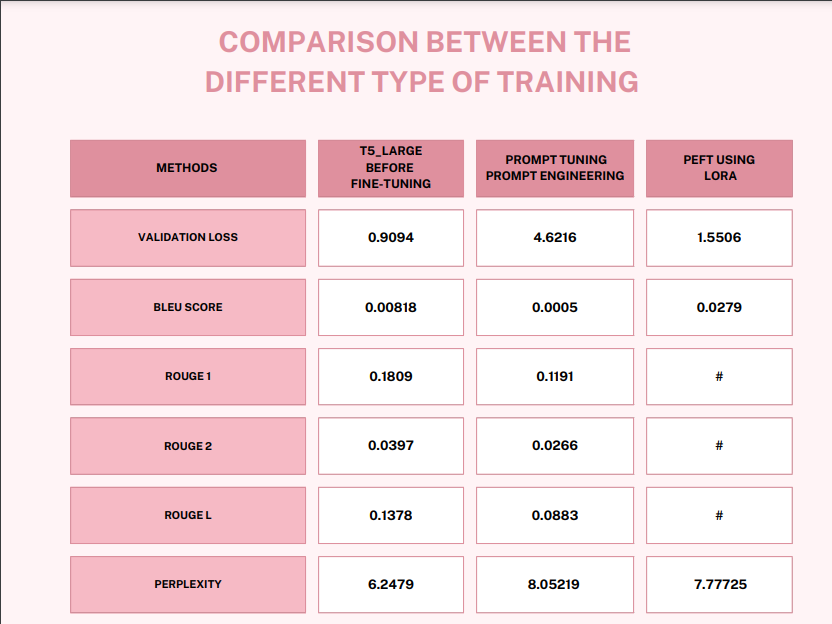

# Fine-Tuning ILLAMA Model:

##Load the Model and Strat Training

In [ ]:
model_id = "genaitraining/llama-2-7b-domain-tuned"

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
# Get the type
compute_dtype = getattr(torch, "float16")

# BitsAndBytesConfig int-4 config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=False,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype
)


In [ ]:
%%time
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

CPU times: user 183 ms, sys: 35.9 ms, total: 219 ms
Wall time: 1.4 s


In [ ]:
%%time
# Load the pretrained model
model = AutoModelForCausalLM.from_pretrained(model_id,
                                             quantization_config=bnb_config,
                                             device_map="auto")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 27.5 s, sys: 31.6 s, total: 59.1 s
Wall time: 6min 26s


## Fine-Tuning with LoRA

In [ ]:
# LoRA config based on QLoRA paper
peft_config = LoraConfig(
                          lora_alpha=16,
                          lora_dropout=0.1,
                          r=64,
                          bias="none",
                          task_type="CAUSAL_LM"
                        )

In [ ]:
# Define the training arguments. For full list of arguments, check
#https://huggingface.co/docs/transformers/main_classes/trainer#transformers.TrainingArguments
args = TrainingArguments(
    output_dir='llama2-7b-tuned-qna',
    num_train_epochs=2, # adjust based on the data size
    per_device_train_batch_size=2, # use 4 if you have more GPU RAM
    save_strategy="epoch", #steps
    # evaluation_strategy="epoch",
    learning_rate=2e-4,
    fp16=True,
    seed=42
)

In [ ]:
# Create the trainer
trainer = SFTTrainer(
    model=model,
    train_dataset=train,
     eval_dataset=test,
    dataset_text_field='text',
    peft_config=peft_config,
    max_seq_length=1042,
    tokenizer=tokenizer,
    args=args,
    packing=True,
)

/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:102: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:427: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [ ]:
# train
trainer.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:1301: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  new_forward = torch.cuda.amp.autocast(dtype=torch.float16)(model_forward_func)
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


TrainOutput(global_step=154, training_loss=1.1683961942598418, metrics={'train_runtime': 1229.9873, 'train_samples_per_second': 0.65, 'train_steps_per_second': 0.325, 'total_flos': 1.2704781746405376e+16, 'train_loss': 1.1683961942598418, 'epoch': 1.39})

In [ ]:
# save model in local
trainer.save_model()

Clean the memory

In [ ]:
# Empty VRAM
del model
del trainer
import gc
gc.collect()
gc.collect()

0

In [ ]:
torch.cuda.empty_cache()

In [ ]:
gc.collect()

18635

In [ ]:
!accelerate config

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
2024-11-14 00:23:31.623018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-14 00:23:31.648265: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-14 00:23:31.656989: E external/local_xla/xla/stream_executor/cuda/cud

In [ ]:
%%time
from peft import AutoPeftModelForCausalLM

new_model = AutoPeftModelForCausalLM.from_pretrained(
    'llama2-7b-tuned-qna',
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map="auto"
      # Specify a directory for offloading
)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 22.7 s, sys: 7.4 s, total: 30 s
Wall time: 1min 17s


## Evaluation

In [ ]:
prompt = "What to do for Viral Gastroenteritis ?"
#ground truth = "The output format of the tasks that the Florence-2 model can handle is text forms, whether it be captioning, object detection, grounding or segmentation."

In [ ]:
input_ids = tokenizer(prompt, return_tensors="pt", truncation=True).input_ids.cuda()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
outputs = new_model.generate(input_ids=input_ids,
                         max_new_tokens=200,
                        #  do_sample=True,
                        #  top_p=0.9,
                         temperature=0.6)

In [ ]:
result = tokenizer.batch_decode(outputs.detach().cpu().numpy(), skip_special_tokens=True)[0]

In [ ]:
print(result)

What to do for Viral Gastroenteritis ?
 Bland fluids can help replace those lost through vomiting and diarrhea. In some cases, a doctor may advise you to drink an oral rehydration solution. The solution contains water, salts, and sugars that help replace those lost. You can buy oral rehydration solution at most drugstores and supermarkets. If you have diarrhea or vomiting, you may want to try a solution that contains electrolytes, like coconut water or sports drinks. These can help replace the salts and sugars lost in your body. If you are vomiting or have diarrhea, you should drink small amounts of fluid often. This will help replace the fluids you lose. You may want to try sipping clear liquids like water, clear broths, or electrolyte solutions. You can also try drinking small amounts of milk or fruit juice. If you have


In [ ]:
def compute_perplexity(model, eval_dataset):
    model.eval()
    total_loss = 0
    count = 0
    for batch in eval_dataset:
        inputs = tokenizer(batch['text'], return_tensors='pt', padding=True, truncation=True, max_length=1042).input_ids
        inputs = inputs.to(model.device)
        with torch.no_grad():
            outputs = model(input_ids=inputs, labels=inputs)
            total_loss += outputs.loss.item() * inputs.size(0)
            count += inputs.size(0)
    return torch.exp(torch.tensor(total_loss / count))

# Calculate and print Perplexity as the evaluation score
perplexity = compute_perplexity(new_model, test)
print(f"Perplexity on the evaluation set: {perplexity}")

Perplexity on the evaluation set: 3.235490322113037


In [ ]:
from datasets import load_metric
from tqdm import tqdm

# Load Exact Match metric
exact_match_metric = load_metric("exact_match")

# Function to evaluate exact match score
def evaluate_exact_match(model, eval_dataset):
    model.eval()
    predictions, references = [], []

    for sample in tqdm(eval_dataset, desc="Evaluating exact match"):
        input_text = sample['text']
        # Tokenize input and generate the response
        inputs = tokenizer(input_text, return_tensors='pt', padding=True, truncation=True, max_length=512).to(model.device)

        with torch.no_grad():
            # Use generate with kwargs (no need to pass inputs as a positional argument)
            output_ids = model.generate(input_ids=inputs['input_ids'], max_length=50, num_beams=1)  # Adjust max_length as needed
        generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        predictions.append(generated_text)
        references.append(input_text)  # In practice, you would use actual reference texts here

    # Calculate exact match score
    exact_match_metric.add_batch(predictions=predictions, references=references)
    em_score = exact_match_metric.compute()

    return em_score

# Run evaluation
em_score = evaluate_exact_match(new_model, test)
print(f"Exact Match Score: {em_score['exact_match']:.4f}")



Evaluating exact match:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 320, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
Evaluating exact match:   1%|          | 1/100 [00:02<04:32,  2.75s/it]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 512, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
Evaluating exact match:   3%|▎         | 3/100 [00:06<03:30,  2.17s/it]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 412, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
Evaluating e

Exact Match Score: 38.0000


### Summary of the Evaluation metrics with ILLAMA

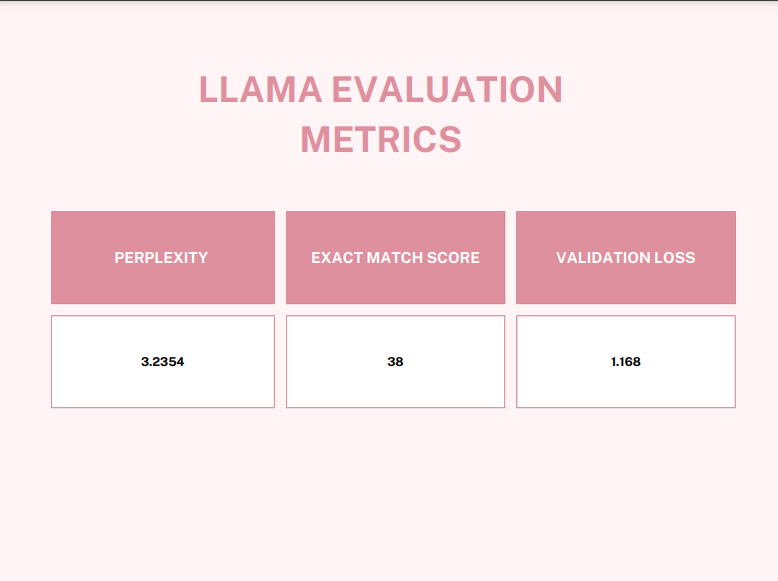

# Conclusion:

In conclusion, this project provided an effective solution for adapting large-scale lan-
guage models for specific use cases with high efficiency, without compromising the per-
formance needed for real-world applications. Future work can build on this foundation
by exploring additional optimization techniques, experimenting with different fine-tuning
strategies, and expanding the scope of tasks to further improve model adaptability and
robustness.